--- Gerador de Dados Iniciado ---
Dataset com 5000 amostras gerado com sucesso.
Salvo como: usina_carvao_dataset.csv

Visualizando os dados gerados...


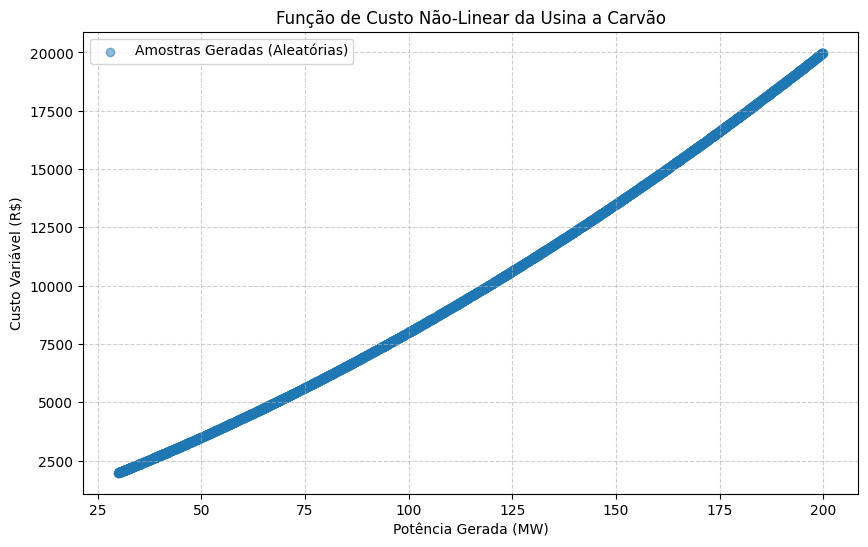

   Potencia_MW    Custo_Real
0   182.187373  17569.690108
1   173.877591  16479.338845
2    87.994452   6828.271848
3    98.816392   7881.919419
4   111.064953   9130.981943


In [1]:
# criar_base_dados.ipynb
#
# Objetivo: Gerar o dataset de treinamento para a rede neural.
# Vamos "simular" a função de custo não-linear da usina a carvão
# e salvar os resultados em um arquivo CSV.
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Definição dos Parâmetros da Usina ---
# (Copiado do problema.txt)

carvao_params = {
    'var_cost_linear': 60,    # R$/MW
    'var_cost_quad': 0.2,     # R$/MW^2
    'min_gen': 30,            # MW (Domínio mínimo da função)
    'max_cap': 200,           # MW (Domínio máximo da função)
}

# --- 2. Definição da Função de Custo "Real" ---
# Esta é a "verdade física" que a rede neural tentará aprender.

def f_custo_carvao(P):
    """
    Calcula o custo variável real da usina a carvão para uma dada potência P.
    Custo = 60*P + 0.2*P^2
    """
    # A função só é válida no domínio de operação [30, 200]
    # No entanto, para o dataset, vamos gerar dados apenas neste domínio.
    
    return (carvao_params['var_cost_linear'] * P +
            carvao_params['var_cost_quad'] * P * P)

print("--- Gerador de Dados Iniciado ---")

# --- 3. Geração dos Dados ---

# Vamos gerar 5000 pontos de dados aleatórios dentro do domínio de operação
# para garantir que a rede veja uma boa distribuição.
N_AMOSTRAS = 5000

# Gerar amostras de potência aleatórias uniformemente distribuídas
# entre o mínimo (30) e o máximo (200)
potencia_amostras = np.random.uniform(
    low=carvao_params['min_gen'],
    high=carvao_params['max_cap'],
    size=N_AMOSTRAS
)

# Calcular o custo real para cada amostra de potência
custo_amostras = [f_custo_carvao(p) for p in potencia_amostras]

# --- 4. Criação do DataFrame e Salvamento ---

# Criar um DataFrame do Pandas com os dados
dataset = pd.DataFrame({
    'Potencia_MW': potencia_amostras,
    'Custo_Real': custo_amostras
})

# Salvar em um arquivo CSV
output_filename = 'usina_carvao_dataset.csv'
dataset.to_csv(output_filename, index=False)

print(f"Dataset com {N_AMOSTRAS} amostras gerado com sucesso.")
print(f"Salvo como: {output_filename}")

# --- 5. Visualização dos Dados (Opcional) ---
# É sempre bom plotar os dados para ver se eles fazem sentido.
print("\nVisualizando os dados gerados...")

# Ordenar os dados para um plot limpo
dataset_sorted = dataset.sort_values(by='Potencia_MW')

plt.figure(figsize=(10, 6))
plt.scatter(
    dataset_sorted['Potencia_MW'], 
    dataset_sorted['Custo_Real'], 
    alpha=0.5, 
    label='Amostras Geradas (Aleatórias)'
)
plt.title('Função de Custo Não-Linear da Usina a Carvão')
plt.xlabel('Potência Gerada (MW)')
plt.ylabel('Custo Variável (R$)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

print(dataset.head())